In [3]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

# Read Data.
data = pd.read_csv("data/variable_interval_aggregate_train.csv", skip_blank_lines=False, index_col=0, infer_datetime_format=True)
y_true = data["stress_level"]

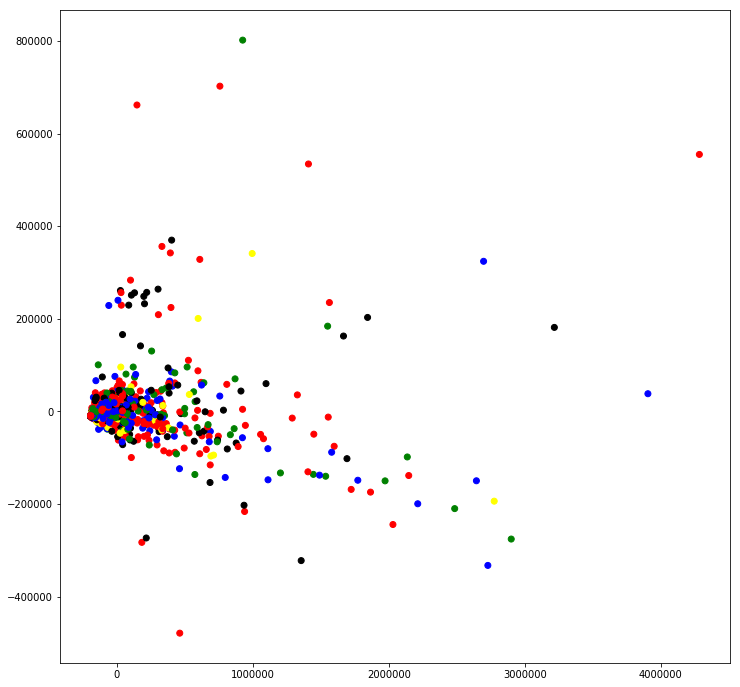

In [4]:
# Performaing PCA on only for all student.
pca_model = PCA(n_components=3)
principle_components = pca_model.fit_transform(data)

# plot the figure

plt.figure(figsize=(12,12))

x = principle_components[:,0]
y =  principle_components[:,1]
z =  principle_components[:,2]


colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'yellow'}

df = pd.DataFrame({'x':x, 'y':y, 'label':y_true})
plt.scatter(df['x'], df['y'], c=df['label'].apply(lambda x: colors[x]))
plt.show()


In [6]:
# 3D PCA on one Student.
# 3d interactive plot using plotly

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
scale_x = 2
scale_y = 2
scale_z = 2

df = pd.DataFrame({'x':x, 'y':y, 'z':z,'label':y_true})

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline

import numpy as np

traces = []

for label in df.label.unique():
    sub_df = df[df.loc[:, 'label']==label]
    trace = go.Scatter3d(
    x= sub_df['x'],
    y= sub_df['y'],
    z= sub_df['z'],
    text = sub_df['label'], 
    mode='markers',
    name="Class " + str(label),
    marker=dict(
        size=12,
        color=colors[label],  # set color to an array/list of desired values
        colorscale=None,   # choose a colorscale
        opacity=0.8
    ))
    traces.append(trace)

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
init_notebook_mode(connected=True)

plotly.offline.plot({
    "data": traces,
    "layout": layout
})

'file://F:\\Projects\\StudentLife-ML-Analysis\\temp-plot.html'

In [7]:
from IPython.display import IFrame
IFrame('pca_student_all.html', width=900, height=500)